In [200]:
import os
import matplotlib.pyplot as plt
import numpy as np
import random
from math import sqrt
import statistics as sts
from LabIFSC import *

In [307]:
def dados(name):
    
    with open('DadosOsciloscopio/' + name,'r') as file:
        file.readline()
        file.readline()
        data = file.readlines()
        x = [] #seconds
        y = [] #volts
        for i in data:
            i = i.split(", ")
            x.append(float(i[0]))
            y.append(float(i[1]))
    
    return x,y

def plot(x,y) -> None:
    
    plt.plot(x,y)
    plt.xlabel('Tempo')
    plt.ylabel('Voltagem')
    plt.show()
    
    return None

def t_meio(x:list,y:list,quant,t_terco = False):
    assert len(y) == len(x), 'Os dois devem ter o mesmo tamanho'
    tam = len(x)
    
    if t_terco:
        t = []
        for _ in range(quant):
            n = random.randint(0,tam//3)
            x1 = x[n]
            y1 = y[n]
            for i in range(tam):
                if y[i] <= y1/3:
                    t.append(x[i]-x1)
                    break

        return t        
    
    else:

        t = []
        for _ in range(quant):
            n = random.randint(0,tam//3)
            x1 = x[n]
            y1 = y[n]
            for i in range(tam):
                if y[i] <= y1/2:
                    t.append(x[i]-x1)
                    break

        return t

In [76]:
with open('DadosOsciloscopio/trans_9_1.csv','r') as file:
    file.readline()
    file.readline()
    data = file.readlines()
    x = [] #seconds
    y = [] #volts
    search = True
    time = []
    for i in data: #2_000 dados aqui
        x,y = map(float,i.split(", "))
        if search:
            if y>=4:
                time.append(x)
                search = False
        elif y<=3:
            search = True
T1 = time[1] - time[0]
T2 = time[2] - time[1]
T3 = (time[2] - time[0])/2
medidas = [T1,T2,T3]

Tf = sts.mean(medidas)
Tf_erro = sts.stdev(medidas)
T = M((Tf,Tf_erro),'s')
print(medidas)
print(T*1000)
print(1/T)

[0.016725, 0.016524999999999998, 0.016625]
16.6±0.1 s
60.2±0.4 s⁻¹


Plotando os gráficos

trans_9_1.csv


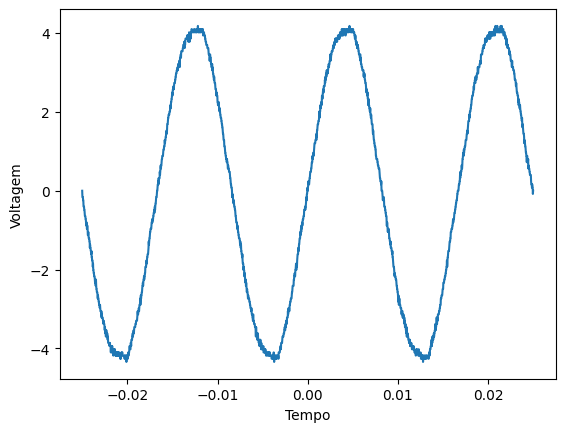

trans_10_1.csv


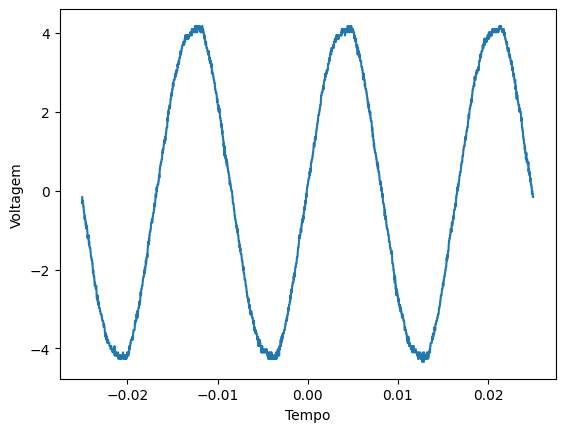

senWave.csv


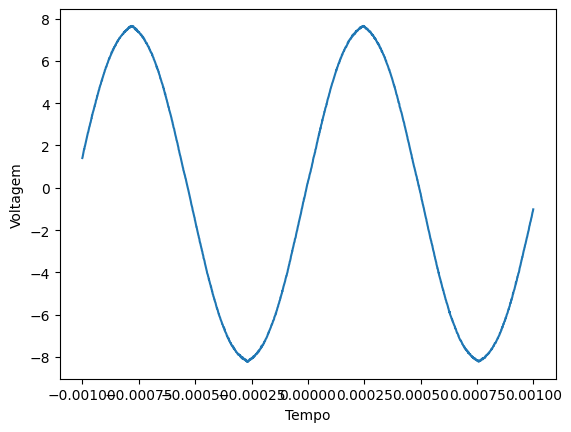

scope_8_1.csv


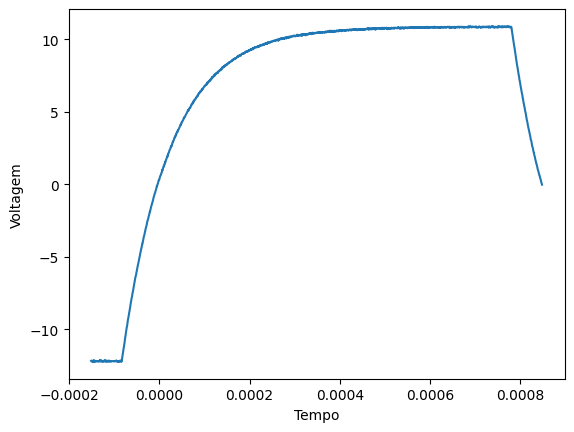

quadraWave.csv


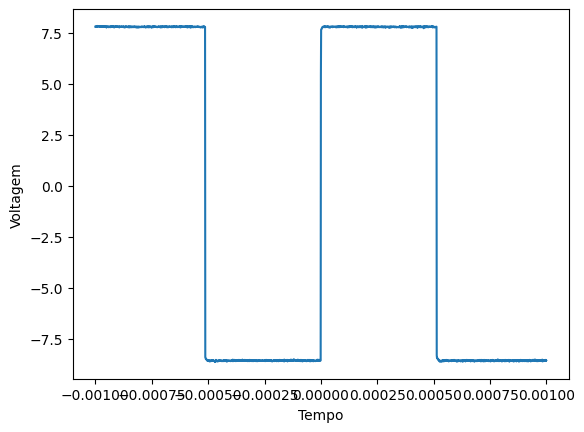

scope_6_1.csv


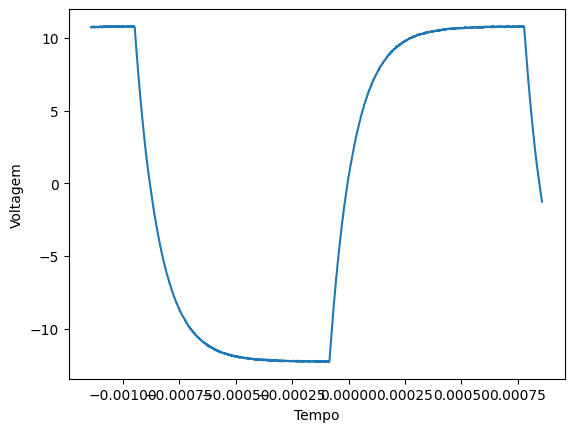

resistorWave.csv


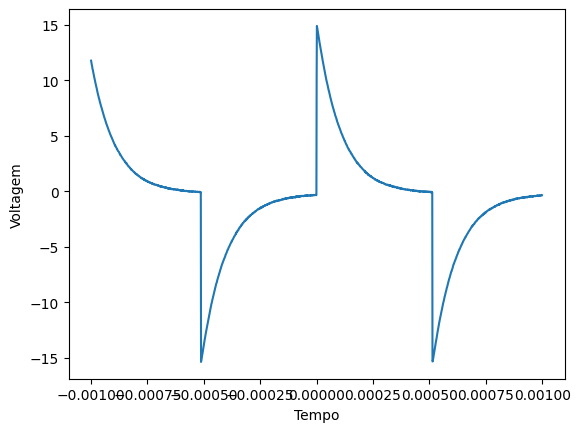

scope_5_1.csv


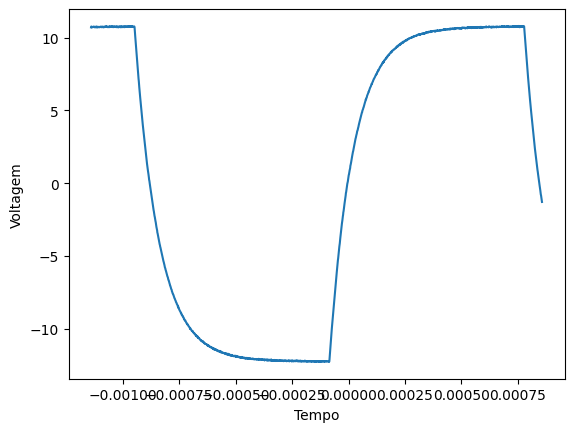

triangWave.csv


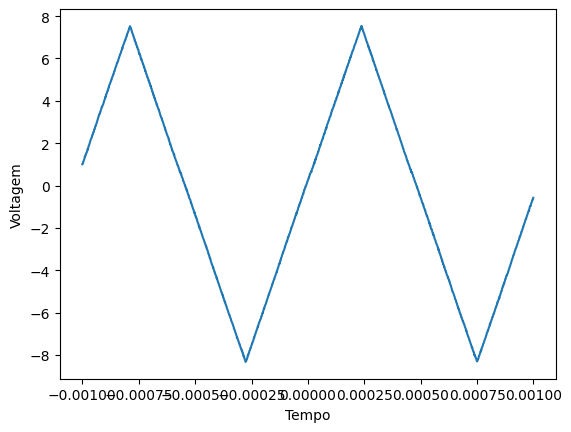

scope_7_1.csv


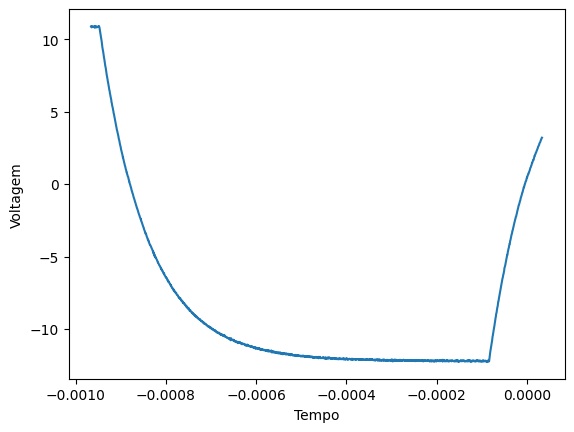

capacitorWave.csv


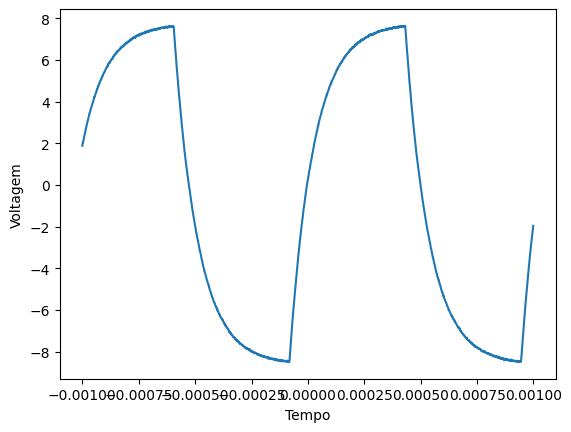

In [133]:
names = os.listdir('DadosOsciloscopio')

for name in names:
    print(name)
    plot(dados(name)[0],dados(name)[1])

Analisando os gráficos

In [287]:
x,y = dados('scope_7_1.csv')
v = min(y)
for i in range(len(y)):
    y[i] -= v

pontosx = [x[0]]
pontosy = [y[0]]

yBig = y[0]
for i,val in enumerate(y):
    if val-y[i+1] >= 7.5e-2:
        continue
    if val<=yBig/2:
        pontosx.append(x[i])
        pontosy.append(y[i])
        break
#print((-pontosx[0]+pontosx[1])/1e-6)
'''plt.plot(x,y)
plt.grid(True)
plt.scatter(pontosx,pontosy)
plt.show()'''
t = t_meio(x[36:1800],y[36:1800],7)
t2 = t_meio(x[36:1800],y[36:1800],7,True)
tmeio = M((sts.mean(t),sts.stdev(t)), 's')
tterco = M((sts.mean(t2),sts.stdev(t2)), 's')
print(t)
print(tmeio/1e-6)
print('-------------')
print(t2)
print(tterco/1e-6)

[7.499987999999992e-05, 7.395821499999995e-05, 5.937490500000002e-05, 7.395821499999995e-05, 7.135405249999999e-05, 7.395821500000006e-05, 7.499988000000003e-05]
72±6 s
-------------
[0.0001234373025, 0.00012239563749999997, 0.00012187480500000004, 0.00012864562750000003, 0.000119791475, 0.00011927064250000002, 0.00011770814499999997]
122±4 s


In [288]:
print((tmeio/1e-6)*sqrt(2))
print((tterco/1e-6)*0.91)
print((tterco/1e-6)*0.91 == (tmeio/1e-6)*sqrt(2))

102±8 s
111±3 s
True


In [308]:
x,y = dados('resistorWave.csv')
v = min(y)
for i in range(len(y)):
    y[i] -= v

init = 965
end = 1450
    
"""plt.plot(x[init:end],y[init:end])
plt.grid(True)
plt.show()"""

t = t_meio(x[init:end],y[init:end],7)
t2 = t_meio(x[init:end],y[init:end],7,True)
tmeio = M((sts.mean(t),sts.stdev(t)), 's')
tterco = M((sts.mean(t2),sts.stdev(t2)), 's')
print(t)
print(tmeio/1e-6)
print('-------------')
print(t2)
print(tterco/1e-6)

StatisticsError: mean requires at least one data point

In [310]:
t = [110.32,108.87,113.54,112.09,113.92]
tmeio = M((sts.mean(t),sts.stdev(t)), 's')
print(tmeio)

112±2 s
